# [albumentations tutorial](https://albumentations.readthedocs.io/en/latest/)

* input 为numpy形式

# Spatial-level transforms

## segmentation

In [ ]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

from albumentations import (
    PadIfNeeded,
    HorizontalFlip,
    VerticalFlip,    
    CenterCrop,    
    Crop,
    Compose,
    Transpose,
    RandomRotate90,
    ElasticTransform,
    GridDistortion, 
    OpticalDistortion,
    RandomSizedCrop,
    OneOf,
    CLAHE,
    RandomBrightnessContrast,    
    RandomGamma    
)

In [ ]:
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

In [ ]:
image = cv2.imread('images/kaggle_salt/0fea4b5049_image.png')
mask = cv2.imread('images/kaggle_salt/0fea4b5049.png', 0)
visualize(image, mask)

### PadIfNeeded

In [ ]:
aug = PadIfNeeded(p=1, min_height=128, min_width=128)

augmented = aug(image=image, mask=mask)

image_padded = augmented['image']
mask_padded = augmented['mask']

print(image_padded.shape, mask_padded.shape)

visualize(image_padded, mask_padded, original_image=image, original_mask=mask)

### CenterCrop and Crop

In [ ]:
aug = CenterCrop(p=1, height=original_height, width=original_width)

augmented = aug(image=image_padded, mask=mask_padded)

image_center_cropped = augmented['image']
mask_center_cropped = augmented['mask']

print(image_center_cropped.shape, mask_center_cropped.shape)

assert (image - image_center_cropped).sum() == 0
assert (mask - mask_center_cropped).sum() == 0

visualize(image_padded, mask_padded, original_image=image_center_cropped, original_mask=mask_center_cropped)

### HorizontalFlip

In [ ]:
aug = HorizontalFlip(p=1)

augmented = aug(image=image, mask=mask)

image_h_flipped = augmented['image']
mask_h_flipped = augmented['mask']

visualize(image_h_flipped, mask_h_flipped, original_image=image, original_mask=mask)

### VerticalFlip

In [ ]:
aug = VerticalFlip(p=1)
augmented = aug(image=image, mask=mask)

image_v_flipped = augmented['image']
mask_v_flipped = augmented['mask']

visualize(image_v_flipped, mask_v_flipped, original_image=image, original_mask=mask)

### RandomRotate90

In [ ]:
aug = RandomRotate90(p=1)

augmented = aug(image=image, mask=mask)

image_rot90 = augmented['image']
mask_rot90 = augmented['mask']

visualize(image_rot90, mask_rot90, original_image=image, original_mask=mask)


## [keypoint](https://nbviewer.jupyter.org/github/albumentations-team/albumentations/blob/master/notebooks/example_keypoints.ipynb)

In [3]:
%matplotlib inline
from urllib.request import urlopen
from matplotlib import pyplot as plt

import albumentations as albu
import numpy as np
import cv2
import os

In [6]:
def download_image(url):
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def vis_points(image, points, diameter=15):

    im = image.copy()
    for (x, y) in points:
        cv2.circle(im, (int(x), int(y)), diameter, (0, 255, 0), -1)
    plt.imshow(im)
    
def create_transformer(transformations):
    return albu.Compose(transformations, p=1, 
                        keypoint_params=albu.KeypointParams(format='xy'))(image=image, keypoints=points)

points = [(100, 100), (720, 410), (1100, 400), (1700, 30), 
          (300, 650), (1570, 590), (560, 800), (1300, 750), 
          (900, 1000), (910, 780), (670, 670), (830, 670), 
          (1000, 670), (1150, 670), (820, 900), (1000, 900)]

image = download_image('https://habrastorage.org/webt/_m/8j/vb/_m8jvb11szwten8kxx5a5rgkhcw.jpeg')

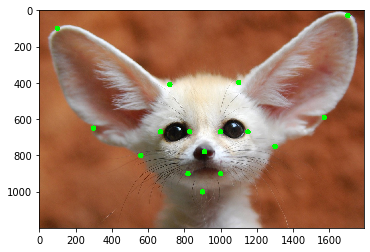

In [7]:
vis_points(image, points)

### VerticalFlip

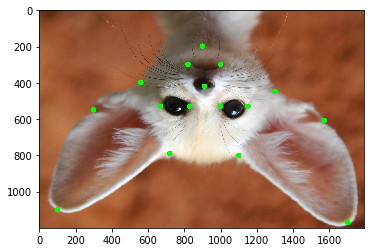

In [9]:
transformed = create_transformer([albu.VerticalFlip(p=1)])

keypoints = transformed['keypoints']
im = transformed['image']
vis_points(im, keypoints)

### HorizontalFlip

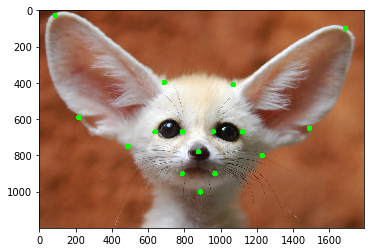

In [10]:
transformed = create_transformer([albu.HorizontalFlip(p=1)])

keypoints = transformed['keypoints']
im = transformed['image']
vis_points(im, keypoints)

### Flip

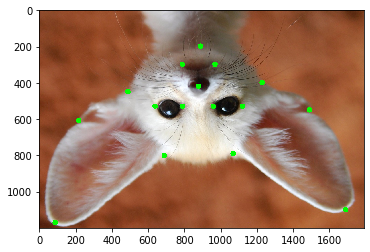

In [11]:
transformed = create_transformer([albu.Flip(p=1)])

keypoints = transformed['keypoints']
im = transformed['image']
vis_points(im, keypoints)

### RandomCrop

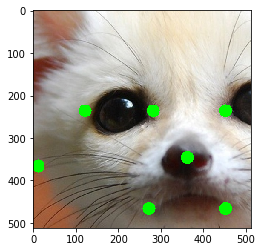

In [12]:
transformed = create_transformer([albu.RandomCrop(width=512, height=512, p=1)])
keypoints = transformed['keypoints']
im = transformed['image']
vis_points(im, keypoints)

### RandomRotate90

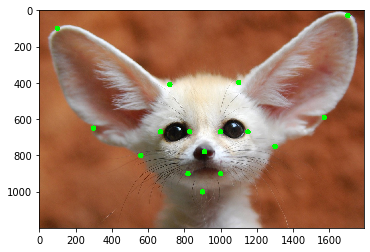

In [13]:
transformed = create_transformer([albu.RandomRotate90(p=1)])

keypoints = transformed['keypoints']
im = transformed['image']
vis_points(im, keypoints)

### CenterCrop

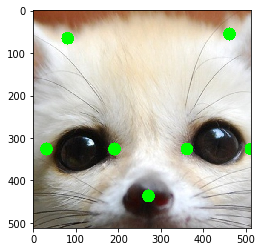

In [14]:
transformed = create_transformer([albu.CenterCrop(height=512, width=512, p=1)])

keypoints = transformed['keypoints']
im = transformed['image']
vis_points(im, keypoints)

## multi_target


In [ ]:
def create_transformer(transformations, images):
    target = {}
    for i, image in enumerate(images[1:]):
        target['image' + str(i)] = 'image'
    return albu.Compose(transformations, p=1, additional_targets=target)(image=images[0],
                                                                        image0=images[1],
                                                                        image1=images[2])
images = [image, image0, image1]
transformed = create_transformer([albu.VerticalFlip(p=1)], images)
im = transformed['image']
im0 = transformed['image0']
im1 = transformed['image1']

# examples

In [2]:
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose
)
import numpy as np

def strong_aug(p=0.5):
    return Compose([
        RandomRotate90(),
        Flip(),
        Transpose(),
        OneOf([
            IAAAdditiveGaussianNoise(),
            GaussNoise(),
        ], p=0.2),
        OneOf([
            MotionBlur(p=0.2),
            MedianBlur(blur_limit=3, p=0.1),
            Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        OneOf([
            OpticalDistortion(p=0.3),
            GridDistortion(p=0.1),
            IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        OneOf([
            CLAHE(clip_limit=2),
            IAASharpen(),
            IAAEmboss(),
            RandomBrightnessContrast(),
        ], p=0.3),
        HueSaturationValue(p=0.3),
    ], p=p)

image = np.ones((300, 300, 3), dtype=np.uint8)
mask = np.ones((300, 300), dtype=np.uint8)
whatever_data = "my name"
augmentation = strong_aug(p=0.9)
data = {"image": image, "mask": mask, "whatever_data": whatever_data, "additional": "hello"}
augmented = augmentation(**data)
image, mask, whatever_data, additional = augmented["image"], augmented["mask"], augmented["whatever_data"], augmented["additional"]
image.shape, mask.shape, whatever_data, additional

((300, 300, 3), (300, 300), 'my name', 'hello')

# pytorch_examples


In [17]:
from PIL import Image
import cv2
import numpy as np
from torch.utils.data import Dataset
from torchvision import transforms
from albumentations import Compose, RandomCrop, Normalize, HorizontalFlip, Resize
from albumentations.pytorch import ToTensor

## An example pipeline that uses torchvision

In [18]:
class TorchvisionDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        label = self.labels[idx]
        file_path = self.file_paths[idx]
        
        # Read an image with PIL
        image = Image.open(file_path)
        if self.transform:
            image = self.transform(image)
        return image, label


torchvision_transform = transforms.Compose([
    transforms.Resize((256, 256)), 
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    )
])


torchvision_dataset = TorchvisionDataset(
    file_paths=['./figs/image_1.jpg', './figs/image_2.jpg', './figs/image_3.jpg'],
    labels=[1, 2, 3],
    transform=torchvision_transform,
)

## The same pipeline with albumentations

In [19]:
class AlbumentationsDataset(Dataset):
    """__init__ and __len__ functions are the same as in TorchvisionDataset"""
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        label = self.labels[idx]
        file_path = self.file_paths[idx]
        
        # Read an image with OpenCV
        image = cv2.imread(file_path)
        # By default OpenCV uses BGR color space for color images,
        # so we need to convert the image to RGB color space.
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        
        return image, label


albumentations_transform = Compose([
    Resize(256, 256), 
    RandomCrop(224, 224),
    HorizontalFlip(),
    Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    ),
    ToTensor()
])


albumentations_dataset = AlbumentationsDataset(
    file_paths=['./figs/image_1.jpg', './figs/image_2.jpg', './figs/image_3.jpg'],
    labels=[1, 2, 3],
    transform=albumentations_transform,
)

## Using albumentations with PIL
You can use PIL instead of OpenCV while working with albumentations, but in this case,
you need to convert a PIL image to a numpy array before applying transformations and then convert back the augmented numpy array to a PIL image.

In [20]:
class AlbumentationsPilDataset(Dataset):
    """__init__ and __len__ functions are the same as in TorchvisionDataset"""
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        label = self.labels[idx]
        file_path = self.file_paths[idx]

        image = Image.open(file_path)
        
        if self.transform:
            # Convert PIL image to numpy array
            image_np = np.array(image)
            # Apply transformations
            augmented = self.transform(image=image_np)
            # Convert numpy array to PIL Image
            image = Image.fromarray(augmented['image'])
        return image, label


albumentations_pil_transform = Compose([
    Resize(256, 256), 
    RandomCrop(224, 224),
    HorizontalFlip(),
])


# Note that this dataset will output PIL images and not numpy arrays nor PyTorch tensors
albumentations_pil_dataset = AlbumentationsPilDataset(
    file_paths=['./figs/image_1.jpg', './figs/image_2.jpg', './figs/image_3.jpg'],
    labels=[1, 2, 3],
    transform=albumentations_pil_transform,
)